In [1]:
from model import *
import numpy as np
from util import *

import argparse

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

In [2]:
def HGMM(n_class, dim, margin, shift = False):
    margin = margin
    mean = np.zeros((n_class , dim))
    #mean[:(n_class // 2), 0] = margin
    #mean[(n_class // 2):, 0] = -margin
    ratio = n_class // 2
    index = 0
    while ratio != 0:
        for i in range(int(n_class // ratio)):
            mean[i*ratio:(i+1)*ratio, index] = (-1) ** i * margin / (2**index)
        #for i in range(8):
            #mean[i*1:(i+1)*1, 2] = (-1) ** i * margin / 4
        ratio = ratio // 2
        index += 1
    if shift:
        '''
        for i in range(n_class):
            mean[i,i * 10:(i*10 + index)] = mean[i,:index]
            if i != 0:
                mean[i,:index] = 0
        '''
        mean[:n_class//2,index:index + index] = mean[:n_class//2,:index]
        mean[:n_class//2,:index] = 0
    return mean

def gen_synthetic(dim, margin, n_class, var, num =100, shift = False):
    mean = HGMM(n_class, dim, margin, shift)
    data = np.random.multivariate_normal(mean[0], np.identity(dim), num)
    cla = np.zeros(num)
    for i in range(1, n_class):
        cla = np.concatenate([cla, i*np.ones(num)])
        data = np.concatenate([data, np.random.multivariate_normal(mean[i], var * np.identity(dim), num)])
    print(data.shape)
    return data, cla
        
def create_data_loader(size = 400, n_class = 16, margin = 8, var = 1, dim = 100, num_per_class = 2000):
    num_batch = n_class * num_per_class // size
    synthetic_data, cla = gen_synthetic(dim, margin, n_class, var, num_per_class, True)
    train_loader = []
    perm = np.random.permutation(n_class * num_per_class)
    synthetic_data = synthetic_data[perm]
    cla = cla[perm]
    for i in range(size):    
        train_loader.append(torch.from_numpy(synthetic_data[i*num_batch:(i+1)*num_batch]).float())
    return train_loader, synthetic_data, cla

In [68]:
N_CLASS = 8
MARGIN = 8
VAR = 1
DIM = 100
HID_DIM = 10
SUBSAMPLE_SIZE = 2048
N = 2000 # num per class
NUM_BATCH = 400


#generate synthetic data
train_loader, synthetic_data, cla = create_data_loader(NUM_BATCH, N_CLASS,MARGIN,VAR,DIM,N)
# train VaDE
model = VaDE(N_CLASS, HID_DIM, DIM)
model.pre_train(train_loader,pre_epoch=50)
train(model, train_loader, 90)
#torch.save(model.state_dict(), "VaDE_parameters_C{}_M{}.pth".format(N_CLASS, MARGIN))
#model.load_state_dict(torch.load("VaDE_parameters_C{}_M{}.pth".format(args.n_class, args.margin)))

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

(16000, 100)
Pretraining......


  2%|█▋                                                                                 | 1/50 [00:03<02:54,  3.55s/it]

L2=1.0407


  4%|███▎                                                                               | 2/50 [00:07<02:55,  3.66s/it]

L2=0.9522


  6%|████▉                                                                              | 3/50 [00:11<02:56,  3.77s/it]

L2=0.9336


  8%|██████▋                                                                            | 4/50 [00:15<02:56,  3.83s/it]

L2=0.9122


 10%|████████▎                                                                          | 5/50 [00:19<02:54,  3.88s/it]

L2=0.9014


 12%|█████████▉                                                                         | 6/50 [00:23<02:52,  3.91s/it]

L2=0.8977


 14%|███████████▌                                                                       | 7/50 [00:27<02:48,  3.91s/it]

L2=0.8946


 16%|█████████████▎                                                                     | 8/50 [00:31<02:44,  3.91s/it]

L2=0.8916


 18%|██████████████▉                                                                    | 9/50 [00:35<02:40,  3.91s/it]

L2=0.8883


 20%|████████████████▍                                                                 | 10/50 [00:39<02:35,  3.90s/it]

L2=0.8851


 22%|██████████████████                                                                | 11/50 [00:42<02:32,  3.90s/it]

L2=0.8821


 24%|███████████████████▋                                                              | 12/50 [00:46<02:27,  3.89s/it]

L2=0.8788


 26%|█████████████████████▎                                                            | 13/50 [00:50<02:23,  3.88s/it]

L2=0.8757


 28%|██████████████████████▉                                                           | 14/50 [00:54<02:20,  3.89s/it]

L2=0.8730


 30%|████████████████████████▌                                                         | 15/50 [00:58<02:15,  3.88s/it]

L2=0.8696


 32%|██████████████████████████▏                                                       | 16/50 [01:02<02:11,  3.86s/it]

L2=0.8666


 34%|███████████████████████████▉                                                      | 17/50 [01:06<02:06,  3.85s/it]

L2=0.8633


 36%|█████████████████████████████▌                                                    | 18/50 [01:09<02:03,  3.85s/it]

L2=0.8614


 38%|███████████████████████████████▏                                                  | 19/50 [01:13<01:59,  3.86s/it]

L2=0.8584


 40%|████████████████████████████████▊                                                 | 20/50 [01:17<01:55,  3.85s/it]

L2=0.8553


 42%|██████████████████████████████████▍                                               | 21/50 [01:21<01:51,  3.84s/it]

L2=0.8523


 44%|████████████████████████████████████                                              | 22/50 [01:25<01:47,  3.83s/it]

L2=0.8501


 46%|█████████████████████████████████████▋                                            | 23/50 [01:29<01:43,  3.83s/it]

L2=0.8474


 48%|███████████████████████████████████████▎                                          | 24/50 [01:32<01:39,  3.82s/it]

L2=0.8450


 50%|█████████████████████████████████████████                                         | 25/50 [01:36<01:35,  3.81s/it]

L2=0.8432


 52%|██████████████████████████████████████████▋                                       | 26/50 [01:40<01:31,  3.81s/it]

L2=0.8406


 54%|████████████████████████████████████████████▎                                     | 27/50 [01:44<01:27,  3.80s/it]

L2=0.8379


 56%|█████████████████████████████████████████████▉                                    | 28/50 [01:48<01:23,  3.79s/it]

L2=0.8355


 58%|███████████████████████████████████████████████▌                                  | 29/50 [01:51<01:19,  3.77s/it]

L2=0.8338


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:55<01:15,  3.77s/it]

L2=0.8314


 62%|██████████████████████████████████████████████████▊                               | 31/50 [01:59<01:11,  3.75s/it]

L2=0.8293


 64%|████████████████████████████████████████████████████▍                             | 32/50 [02:03<01:07,  3.76s/it]

L2=0.8267


 66%|██████████████████████████████████████████████████████                            | 33/50 [02:06<01:03,  3.74s/it]

L2=0.8250


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [02:10<00:59,  3.69s/it]

L2=0.8232


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [02:13<00:54,  3.61s/it]

L2=0.8218


 72%|███████████████████████████████████████████████████████████                       | 36/50 [02:17<00:49,  3.53s/it]

L2=0.8206


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [02:20<00:45,  3.47s/it]

L2=0.8188


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [02:23<00:41,  3.44s/it]

L2=0.8162


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [02:27<00:37,  3.43s/it]

L2=0.8143


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [02:30<00:34,  3.40s/it]

L2=0.8132


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [02:33<00:30,  3.39s/it]

L2=0.8116


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [02:37<00:27,  3.40s/it]

L2=0.8107


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [02:40<00:23,  3.40s/it]

L2=0.8090


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [02:44<00:20,  3.40s/it]

L2=0.8079


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [02:47<00:16,  3.39s/it]

L2=0.8070


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [02:50<00:13,  3.41s/it]

L2=0.8070


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [02:54<00:10,  3.43s/it]

L2=0.8044


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [02:57<00:06,  3.44s/it]

L2=0.8030


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [03:01<00:03,  3.45s/it]

L2=0.8008


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:04<00:00,  3.70s/it]


L2=0.7993


  1%|▉                                                                                  | 1/90 [00:05<08:39,  5.84s/it]

127.41181560516357


  2%|█▊                                                                                 | 2/90 [00:11<08:36,  5.87s/it]

112.25049369812012


  3%|██▊                                                                                | 3/90 [00:17<08:30,  5.87s/it]

109.18216711997985


  4%|███▋                                                                               | 4/90 [00:23<08:27,  5.90s/it]

106.9782743549347


  6%|████▌                                                                              | 5/90 [00:29<08:30,  6.00s/it]

105.28342163085938


  7%|█████▌                                                                             | 6/90 [00:36<08:33,  6.11s/it]

103.95587453842163


  8%|██████▍                                                                            | 7/90 [00:42<08:21,  6.05s/it]

102.7733061695099


  9%|███████▍                                                                           | 8/90 [00:48<08:11,  6.00s/it]

101.8422574043274


 10%|████████▎                                                                          | 9/90 [00:53<08:02,  5.96s/it]

100.97398864746094


 11%|█████████                                                                         | 10/90 [00:59<07:57,  5.97s/it]

100.2807694530487


 12%|██████████                                                                        | 11/90 [01:06<07:56,  6.04s/it]

99.51721930503845


 13%|██████████▉                                                                       | 12/90 [01:11<07:46,  5.98s/it]

98.89594617843628


 14%|███████████▊                                                                      | 13/90 [01:17<07:40,  5.97s/it]

98.25447527885437


 16%|████████████▊                                                                     | 14/90 [01:23<07:32,  5.96s/it]

97.59355405807496


 17%|█████████████▋                                                                    | 15/90 [01:29<07:23,  5.91s/it]

97.06207958221435


 18%|██████████████▌                                                                   | 16/90 [01:35<07:17,  5.92s/it]

96.53955711364746


 19%|███████████████▍                                                                  | 17/90 [01:41<07:12,  5.92s/it]

96.01891610145569


 20%|████████████████▍                                                                 | 18/90 [01:47<07:06,  5.93s/it]

95.42886847496032


 21%|█████████████████▎                                                                | 19/90 [01:53<07:00,  5.93s/it]

94.8583858680725


 22%|██████████████████▏                                                               | 20/90 [01:59<06:54,  5.92s/it]

94.40555000305176


 23%|███████████████████▏                                                              | 21/90 [02:05<06:50,  5.95s/it]

93.86698950767517


 24%|████████████████████                                                              | 22/90 [02:11<06:47,  5.99s/it]

93.35643277168273


 26%|████████████████████▉                                                             | 23/90 [02:17<06:40,  5.98s/it]

92.87584971427917


 27%|█████████████████████▊                                                            | 24/90 [02:23<06:33,  5.96s/it]

92.37795453071594


 28%|██████████████████████▊                                                           | 25/90 [02:29<06:27,  5.95s/it]

91.92032856941223


 29%|███████████████████████▋                                                          | 26/90 [02:35<06:23,  5.99s/it]

91.4357921218872


 30%|████████████████████████▌                                                         | 27/90 [02:41<06:15,  5.95s/it]

90.9523581123352


 31%|█████████████████████████▌                                                        | 28/90 [02:47<06:08,  5.95s/it]

90.50484981536866


 32%|██████████████████████████▍                                                       | 29/90 [02:52<06:01,  5.92s/it]

90.01928285598756


 33%|███████████████████████████▎                                                      | 30/90 [02:58<05:56,  5.95s/it]

89.62140496253967


 34%|████████████████████████████▏                                                     | 31/90 [03:04<05:52,  5.98s/it]

89.05862742424011


 36%|█████████████████████████████▏                                                    | 32/90 [03:10<05:46,  5.98s/it]

88.60671416282653


 37%|██████████████████████████████                                                    | 33/90 [03:16<05:39,  5.95s/it]

88.15002624511719


 38%|██████████████████████████████▉                                                   | 34/90 [03:22<05:33,  5.95s/it]

87.7099882888794


 39%|███████████████████████████████▉                                                  | 35/90 [03:28<05:27,  5.96s/it]

87.32780204772949


 40%|████████████████████████████████▊                                                 | 36/90 [03:34<05:23,  5.98s/it]

86.81169025421143


 41%|█████████████████████████████████▋                                                | 37/90 [03:40<05:16,  5.98s/it]

86.37325883865357


 42%|██████████████████████████████████▌                                               | 38/90 [03:46<05:09,  5.95s/it]

85.95615717887878


 43%|███████████████████████████████████▌                                              | 39/90 [03:52<05:04,  5.97s/it]

85.47235516548157


 44%|████████████████████████████████████▍                                             | 40/90 [03:58<04:57,  5.95s/it]

85.11934746742249


 46%|█████████████████████████████████████▎                                            | 41/90 [04:04<04:51,  5.94s/it]

84.61507894515991


 47%|██████████████████████████████████████▎                                           | 42/90 [04:10<04:45,  5.96s/it]

84.1635251903534


 48%|███████████████████████████████████████▏                                          | 43/90 [04:16<04:38,  5.94s/it]

83.76096256256103


 49%|████████████████████████████████████████                                          | 44/90 [04:22<04:36,  6.02s/it]

83.31233706474305


 50%|█████████████████████████████████████████                                         | 45/90 [04:28<04:29,  5.99s/it]

82.84675671577453


 51%|█████████████████████████████████████████▉                                        | 46/90 [04:34<04:22,  5.96s/it]

82.49361222267152


 52%|██████████████████████████████████████████▊                                       | 47/90 [04:40<04:15,  5.93s/it]

82.02707084655762


 53%|███████████████████████████████████████████▋                                      | 48/90 [04:46<04:09,  5.93s/it]

81.52558121681213


 54%|████████████████████████████████████████████▋                                     | 49/90 [04:52<04:03,  5.94s/it]

81.15541837692261


 56%|█████████████████████████████████████████████▌                                    | 50/90 [04:58<03:57,  5.93s/it]

80.67438618659973


 57%|██████████████████████████████████████████████▍                                   | 51/90 [05:03<03:51,  5.93s/it]

80.20058366775513


 58%|███████████████████████████████████████████████▍                                  | 52/90 [05:10<03:46,  5.96s/it]

79.78781673431396


 59%|████████████████████████████████████████████████▎                                 | 53/90 [05:16<03:41,  5.98s/it]

79.4178840637207


 60%|█████████████████████████████████████████████████▏                                | 54/90 [05:21<03:33,  5.94s/it]

79.00641444206238


 61%|██████████████████████████████████████████████████                                | 55/90 [05:27<03:27,  5.92s/it]

78.54033912658691


 62%|███████████████████████████████████████████████████                               | 56/90 [05:33<03:20,  5.90s/it]

78.10733739852905


 63%|███████████████████████████████████████████████████▉                              | 57/90 [05:39<03:19,  6.04s/it]

77.71424401283264


 64%|████████████████████████████████████████████████████▊                             | 58/90 [05:46<03:14,  6.07s/it]

77.32027194976807


 66%|█████████████████████████████████████████████████████▊                            | 59/90 [05:52<03:07,  6.05s/it]

76.86161418914794


 67%|██████████████████████████████████████████████████████▋                           | 60/90 [05:58<03:01,  6.03s/it]

76.39670832633972


 68%|███████████████████████████████████████████████████████▌                          | 61/90 [06:04<02:53,  5.99s/it]

76.00499784469605


 69%|████████████████████████████████████████████████████████▍                         | 62/90 [06:09<02:47,  5.97s/it]

75.57797242164612


 70%|█████████████████████████████████████████████████████████▍                        | 63/90 [06:15<02:40,  5.94s/it]

75.13057705879211


 71%|██████████████████████████████████████████████████████████▎                       | 64/90 [06:21<02:34,  5.95s/it]

74.72328965187073


 72%|███████████████████████████████████████████████████████████▏                      | 65/90 [06:27<02:28,  5.95s/it]

74.27918886184692


 73%|████████████████████████████████████████████████████████████▏                     | 66/90 [06:33<02:22,  5.92s/it]

73.89098246574402


 74%|█████████████████████████████████████████████████████████████                     | 67/90 [06:39<02:16,  5.94s/it]

73.4515965938568


 76%|█████████████████████████████████████████████████████████████▉                    | 68/90 [06:45<02:12,  6.02s/it]

73.00628886222839


 77%|██████████████████████████████████████████████████████████████▊                   | 69/90 [06:51<02:06,  6.03s/it]

72.56150064468383


 78%|███████████████████████████████████████████████████████████████▊                  | 70/90 [06:57<02:00,  6.01s/it]

72.16499752044678


 79%|████████████████████████████████████████████████████████████████▋                 | 71/90 [07:03<01:54,  6.00s/it]

71.7445985364914


 80%|█████████████████████████████████████████████████████████████████▌                | 72/90 [07:09<01:48,  6.02s/it]

71.33219024658203


 81%|██████████████████████████████████████████████████████████████████▌               | 73/90 [07:15<01:42,  6.04s/it]

70.9257810497284


 82%|███████████████████████████████████████████████████████████████████▍              | 74/90 [07:22<01:37,  6.06s/it]

70.5285741853714


 83%|████████████████████████████████████████████████████████████████████▎             | 75/90 [07:28<01:31,  6.11s/it]

70.10928841590881


 84%|█████████████████████████████████████████████████████████████████████▏            | 76/90 [07:34<01:25,  6.09s/it]

69.72056821823121


 86%|██████████████████████████████████████████████████████████████████████▏           | 77/90 [07:40<01:20,  6.16s/it]

69.21570695400239


 87%|███████████████████████████████████████████████████████████████████████           | 78/90 [07:46<01:13,  6.15s/it]

68.79314913272857


 88%|███████████████████████████████████████████████████████████████████████▉          | 79/90 [07:52<01:07,  6.17s/it]

68.36509155273437


 89%|████████████████████████████████████████████████████████████████████████▉         | 80/90 [07:59<01:01,  6.16s/it]

67.92961486816407


 90%|█████████████████████████████████████████████████████████████████████████▊        | 81/90 [08:05<00:55,  6.19s/it]

67.54195926189422


 91%|██████████████████████████████████████████████████████████████████████████▋       | 82/90 [08:11<00:49,  6.24s/it]

67.08140396595002


 92%|███████████████████████████████████████████████████████████████████████████▌      | 83/90 [08:17<00:43,  6.21s/it]

66.64472438812255


 93%|████████████████████████████████████████████████████████████████████████████▌     | 84/90 [08:24<00:37,  6.21s/it]

66.2959604549408


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 85/90 [08:30<00:30,  6.19s/it]

65.8184472990036


 96%|██████████████████████████████████████████████████████████████████████████████▎   | 86/90 [08:36<00:24,  6.21s/it]

65.39475538253784


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 87/90 [08:42<00:18,  6.22s/it]

65.07999250888824


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 88/90 [08:48<00:12,  6.19s/it]

64.65124208450317


 99%|█████████████████████████████████████████████████████████████████████████████████ | 89/90 [08:55<00:06,  6.24s/it]

nan


100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [09:01<00:00,  6.02s/it]

nan


In [75]:
class VaDE(nn.Module):
    def __init__(self,nClusters, hid_dim, input_dim = 100):
        super(VaDE,self).__init__()
        self.encoder=Encoder(input_dim, [50,20,10], hid_dim=hid_dim)
        self.decoder=Decoder(input_dim, [50,20,10], hid_dim=hid_dim)

        self.pi_=nn.Parameter(torch.FloatTensor(nClusters,).fill_(1)/nClusters,requires_grad=True)
        self.mu_c=nn.Parameter(torch.FloatTensor(nClusters,hid_dim).fill_(0),requires_grad=True)
        self.log_sigma2_c=nn.Parameter(torch.FloatTensor(nClusters,hid_dim).fill_(0),requires_grad=True)
        self.nClusters = nClusters


    def pre_train(self,dataloader,pre_epoch=10):
        Loss=nn.MSELoss()
        opti=Adam(itertools.chain(self.encoder.parameters(),self.decoder.parameters()))

        print('Pretraining......')
        epoch_bar=tqdm(range(pre_epoch))
        for _ in epoch_bar:
            L=0
            for x in dataloader:
                z,_=self.encoder(x)
                x_=self.decoder(z)
                loss=Loss(x,x_)

                L+=loss.detach().cpu().numpy()

                opti.zero_grad()
                loss.backward()
                opti.step()

            epoch_bar.write('L2={:.4f}'.format(L/len(dataloader)))

        self.encoder.log_sigma2_l.load_state_dict(self.encoder.mu_l.state_dict())

        Z = []
        with torch.no_grad():
            for x in dataloader:
                z1, z2 = self.encoder(x)
                assert F.mse_loss(z1, z2) == 0
                Z.append(z1)


        Z = torch.cat(Z, 0).detach().cpu().numpy()

        gmm = GaussianMixture(n_components=self.nClusters, covariance_type='diag')

        pre = gmm.fit_predict(Z)


        self.pi_.data = torch.from_numpy(gmm.weights_).float()
        self.mu_c.data = torch.from_numpy(gmm.means_).float()
        self.log_sigma2_c.data = torch.log(torch.from_numpy(gmm.covariances_).float())



    def predict(self,x):
        z_mu, z_sigma2_log = self.encoder(x)
        z = torch.randn_like(z_mu) * torch.exp(z_sigma2_log / 2) + z_mu
        pi = self.pi_
        log_sigma2_c = self.log_sigma2_c
        mu_c = self.mu_c
        yita_c = torch.exp(torch.log(pi.unsqueeze(0))+self.gaussian_pdfs_log(z,mu_c,log_sigma2_c))

        yita=yita_c.detach().cpu().numpy()
        return np.argmax(yita,axis=1)


    def ELBO_Loss(self,x,L=1):
        det=1e-10

        L_rec=0

        z_mu, z_sigma2_log = self.encoder(x)
        #print("z_mu:", torch.sum(torch.isnan(z_mu)))
        #print("z_sigma2_log:", torch.sum(torch.isnan(z_sigma2_log)))
        for l in range(L):

            z=torch.randn_like(z_mu)*torch.exp(z_sigma2_log/2)+z_mu

            x_pro=self.decoder(z)
            #L_rec+=F.binary_cross_entropy(x_pro,x)
            L_rec+=F.mse_loss(x_pro, x)
        #print("L_rec:", torch.isnan(L_rec))
        L_rec/=L
        Loss=L_rec*x.size(1)
        pi=self.pi_ * (self.pi_ > 0) + 1e-5
        log_sigma2_c=self.log_sigma2_c
        mu_c=self.mu_c
    
        z = torch.randn_like(z_mu) * torch.exp(z_sigma2_log / 2) + z_mu
        yita_c=torch.exp(torch.log(pi.unsqueeze(0))+self.gaussian_pdfs_log(z,mu_c,log_sigma2_c))+det
        #print("pi", pi.unsqueeze(0))
        yita_c=yita_c/(yita_c.sum(1).view(-1,1))#batch_size*Clusters
        
        Loss+=2 * 0.5*torch.mean(torch.sum(yita_c*torch.sum(log_sigma2_c.unsqueeze(0)+
                                                torch.exp(z_sigma2_log.unsqueeze(1)-log_sigma2_c.unsqueeze(0))+
                                                (z_mu.unsqueeze(1)-mu_c.unsqueeze(0)).pow(2)/torch.exp(log_sigma2_c.unsqueeze(0)),2),1))
        #print("loss1:", torch.isnan(Loss))
        Loss-=torch.mean(torch.sum(yita_c*torch.log(pi.unsqueeze(0)/(yita_c)),1))+0.5*torch.mean(torch.sum(1+z_sigma2_log,1))
        return Loss






    def gaussian_pdfs_log(self,x,mus,log_sigma2s):
        G=[]
        for c in range(self.nClusters):
            G.append(self.gaussian_pdf_log(x,mus[c:c+1,:],log_sigma2s[c:c+1,:]).view(-1,1))
        return torch.cat(G,1)




    @staticmethod
    def gaussian_pdf_log(x,mu,log_sigma2):
        return -0.5*(torch.sum(np.log(np.pi*2)+log_sigma2+(x-mu).pow(2)/torch.exp(log_sigma2),1))

In [76]:
# second training:
NUM_BATCH = 400
mean, _ = model.encoder(torch.from_numpy(synthetic_data).float())
train_loader2 = []
for i in range(N_CLASS * N // NUM_BATCH):    
    train_loader2.append(mean[i*NUM_BATCH:(i+1)*NUM_BATCH].detach())

model2 = VaDE(N_CLASS, 3, 10)
model2.pre_train(train_loader2,pre_epoch=50)
train(model, train_loader, 90)




  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


                                                                                                                 


  0%|                                                                                           | 0/50 [02:13<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:53<00:11,  2.72it/s]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


  2%|█▋                                                                                 | 1/50 [00:00<00:07,  6.15it/s]

Pretraining......
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:13<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:53<00:11,  2.72it/s]


  2%|█▋                                                                                 | 1/50 [00:00<00:07,  6.15it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:13<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:53<00:11,  2.72it/s]


  6%|████▉                                                                              | 3/50 [00:00<00:07,  6.09it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:14<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:54<00:11,  2.72it/s]


 10%|████████▎                                                                          | 5/50 [00:00<00:07,  6.05it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:14<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:54<00:11,  2.72it/s]


 14%|███████████▌                                                                       | 7/50 [00:01<00:07,  6.03it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:14<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:55<00:11,  2.72it/s]


 18%|██████████████▉                                                                    | 9/50 [00:01<00:06,  6.10it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:15<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:55<00:11,  2.72it/s]


 22%|██████████████████                                                                | 11/50 [00:02<00:06,  5.87it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:15<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:55<00:11,  2.72it/s]


 26%|█████████████████████▎                                                            | 13/50 [00:02<00:06,  5.98it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:15<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:56<00:11,  2.72it/s]


 30%|████████████████████████▌                                                         | 15/50 [00:02<00:05,  5.96it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:16<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:56<00:11,  2.72it/s]


 34%|███████████████████████████▉                                                      | 17/50 [00:02<00:05,  6.05it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:16<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:56<00:11,  2.72it/s]


 38%|███████████████████████████████▏                                                  | 19/50 [00:03<00:05,  5.99it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:16<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:57<00:11,  2.72it/s]


 42%|██████████████████████████████████▍                                               | 21/50 [00:03<00:04,  6.01it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:17<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:57<00:11,  2.72it/s]


 46%|█████████████████████████████████████▋                                            | 23/50 [00:04<00:04,  5.95it/s]


                                                                                                                       
                                                                                                                    

                                           

L2=nan
L2=nan


                                                                                                                       
                                                                                                                    

                                                                                                                 


  0%|                                                                                           | 0/50 [02:17<?, ?it/s]

 36%|█████████████████████████████▌                                                    | 18/50 [01:57<00:11,  2.72it/s]


 50%|█████████████████████████████████████████                                         | 25/50 [00:04<00:04,  6.01it/s]


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:04<00:04,  5.99it/s]

L2=nan


KeyboardInterrupt: 

In [77]:
subsample_index = np.arange(128)
for i in range(1, N_CLASS):
    subsample_index = np.concatenate([subsample_index, i * N + np.arange(128)])

mean, _ = model.encoder(torch.from_numpy(synthetic_data).float())
pca = PCA(n_components = HID_DIM)
projection = pca.fit_transform(synthetic_data)


In [78]:
index = np.random.choice(np.arange(len(mean)), 2048)
Z = linkage(mean[index].detach(), "ward")

z = TSNE(n_components=2).fit_transform(synthetic_data[index])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = cla[index], palette=sns.color_palette("Paired", 8), legend = "full")
plt.show()

z = TSNE(n_components=2).fit_transform(mean[index].detach())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = cla[index], palette=sns.color_palette("Paired", 8), legend = "full")
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

In [66]:
pred = model.predict(torch.from_numpy(synthetic_data).float())
print(model.pi_)

Parameter containing:
tensor([ 1.1893e+01,  4.3876e+00,  1.2706e+01,  1.2704e+01, -2.4595e-03,
         1.1141e+01,  1.2295e+01,  9.6166e+00], requires_grad=True)


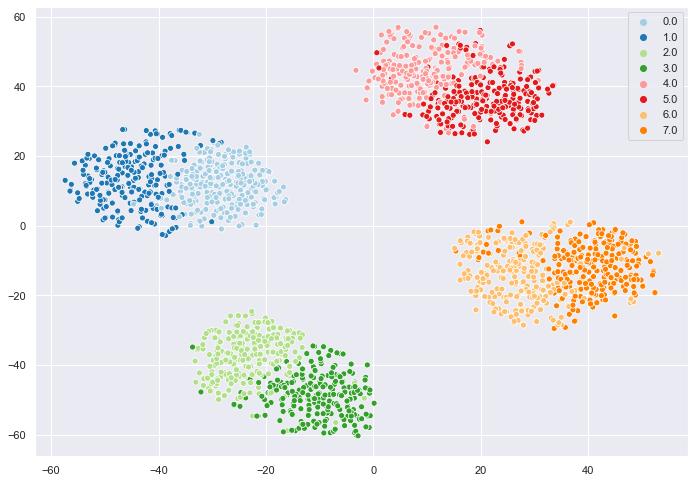

In [67]:
def transformation(model, data, rate = 2):
    mean, _ = model.encoder(torch.from_numpy(data).float())
    pred = model.predict(torch.from_numpy(data).float())
    cluster_means = model.mu_c[pred]
    scaled_cluster_means = cluster_means * rate
    scaled_mean = (mean - cluster_means) + scaled_cluster_means
    return scaled_mean.detach()

scaled_mean = transformation(model, synthetic_data[index])
z = TSNE(n_components=2).fit_transform(scaled_mean.detach())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = cla[index], palette=sns.color_palette("Paired", 8), legend = "full")

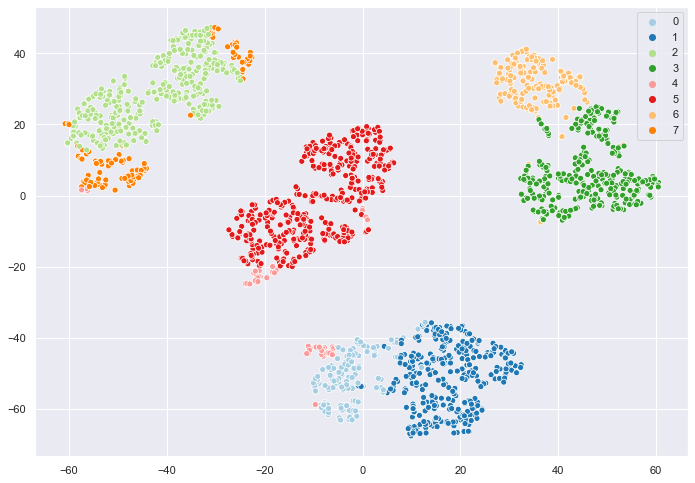

In [53]:
z = TSNE(n_components=2).fit_transform(mean[index].detach())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = pred[index], palette=sns.color_palette("Paired", 8), legend = "full")

In [ ]:
print("VaDE:", compute_purity_average(mean.detach().numpy(), cla, N_CLASS, 2048, 50, method = args.linkage_method))
print("PCA:", compute_purity_average(projection, cla, N_CLASS, 2048, 50, method = args.linkage_method))
print("Origin:", compute_purity_average(synthetic_data, cla, N_CLASS, 2048, 50, method = args.linkage_method))

print(compute_MW_objective_average(model, mean.detach().numpy(), cla, 2048, 50, method = args.linkage_method))
print(compute_MW_objective_average(model, projection, cla, 2048, 50, method = args.linkage_method))
print(compute_MW_objective_average(model, synthetic_data, cla, 2048, 50, method = args.linkage_method))

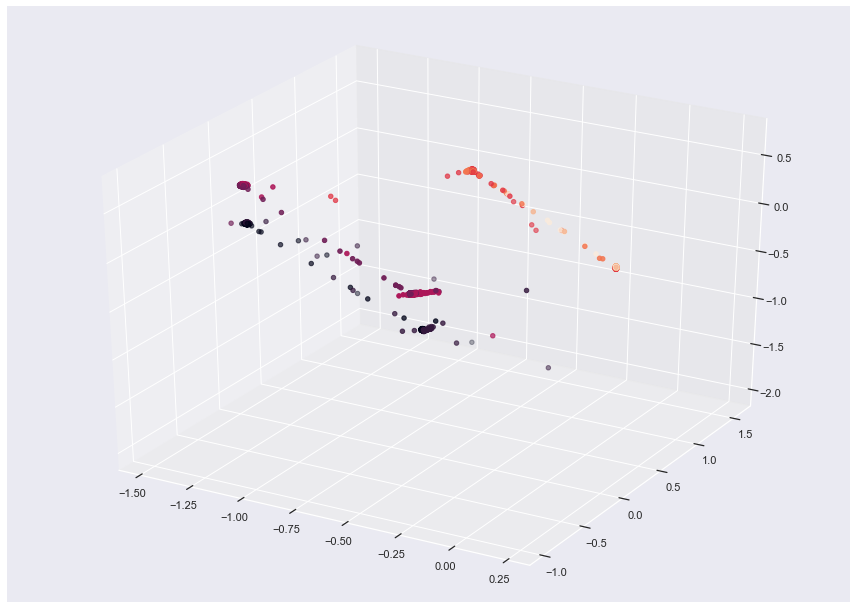

In [22]:
from mpl_toolkits.mplot3d import Axes3D

viz_mean = mean.detach().numpy()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(viz_mean[:, 0], viz_mean[:, 1], viz_mean[:,2], c = cla)
plt.show()

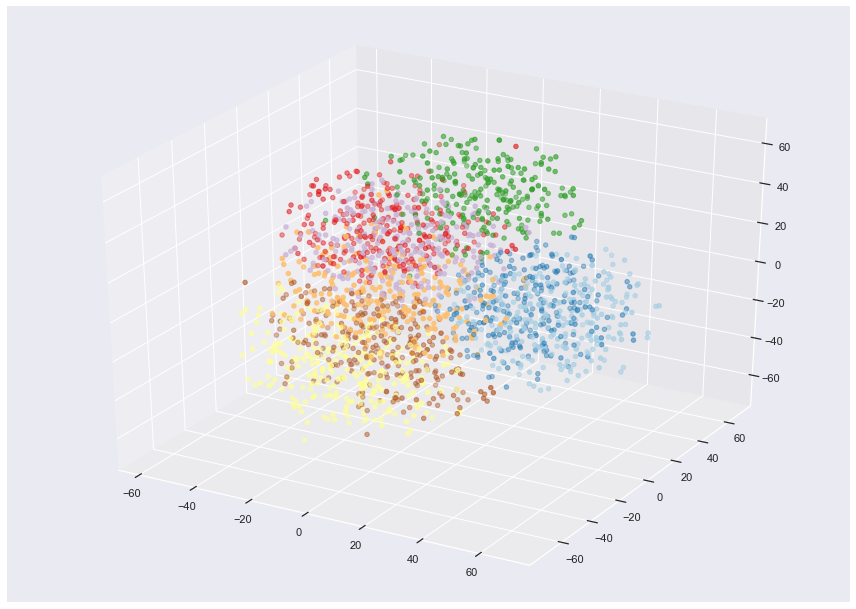

In [45]:
z = TSNE(n_components=3).fit_transform(synthetic_data[index])

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(z[:, 0], z[:, 1], z[:,2], c = cla[index], cmap = "Paired")
plt.show()

In [63]:
N = 128
sum = 0
for i in range(6):
    sum += 2 ** i * (8 * N - N / (2**i)) * (N / (2**i) * (N/(2**i) - 1) /2)
sum = sum * 8
sum

117921792.0

In [57]:
test_cla = np.zeros(128)
for i in range(1, 8):
    test_cla = np.concatenate([test_cla, i * np.ones(128)])
test_cla

array([0., 0., 0., ..., 7., 7., 7.])

In [59]:
Z = linkage(test_cla.reshape(-1,1), "ward")
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z, rd=True)
max = compute_objective_gt(1024, rootnode, test_cla)
max

60992512